In [1]:
"""
Author:   Chuck Stewart
Course:   CSCI 4270 and 6270
Lecture:  02
File:     ex4_histogram.ipynb

Purpose:  Show an image side-by-side with its histogram.  Demonstrates
use of gray-scale conversion, shape and type changes, calculation of
histgrams, and non-image display in MatPlotLib.

Some of this code is adapted from:
http://docs.opencv.org/trunk/d1/db7/tutorial_py_histogram_begins.html
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
'''
Open the image and determine if it is color or grayscale
'''
image_fn = "/Users/stewart/Dropbox/cv_2024_spring/lec02_images/images/lg-image26.jpg"
# image_fn = "/Users/stewart/Dropbox/cv_2024_spring/lec02_images/trees_gray.png"
im = cv2.imread(image_fn)

is_color = len(im.shape) == 3
print(f'Image {image_fn}\n' +
      f'Shape: {im.shape}\n' +
      f'is_color: {is_color}')

#  If color, convert to RGB
if is_color:
   im = cv2.cvtColor(im, cv2.cv2.COLOR_BGR2RGB)

Image /Users/stewart/Dropbox/cv_2024_spring/lec02_images/images/lg-image26.jpg
Shape: (1312, 2000, 3)
is_color: True


In [4]:
'''
Get a gray scale version of the image. Nothing needs to be done, of course, if the image
is already gray scale
'''
if is_color:
    """
    # Here is NumPy code for gray scale conversion. Note that
    # different weights are needed for red, green, blue.
    # 0.299 weight on red is applied to entry 2 in each pixel
    im1 = 0.299*im[:,:,0] + 0.587*im[:,:,1] + 0.114*im[:,:,2]
    im_g = im1.astype(im.dtype)
    """

    # This is the OpenCV code for gray scale conversion
    im_g = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
else:
    im_g = im

print('Shape after conversion is', im_g.shape)


Shape after conversion is (1312, 2000)


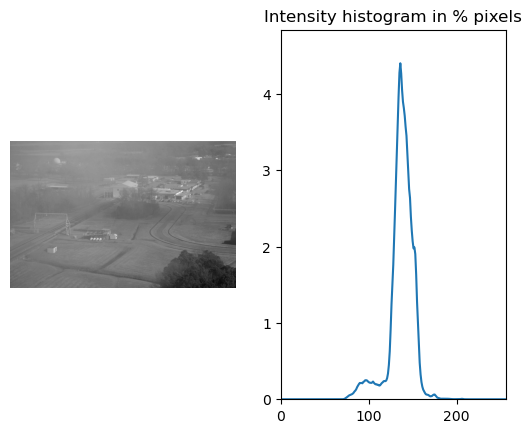

In [5]:
'''
Form a gray scale histogram and plot it next to the gray scale image.
'''
# Plot the image on the left side.
plt.subplot(121, aspect='equal')
plt.axis("off")
plt.gray()
plt.imshow(im_g)

# Form the histogram
num_pixels = im_g.shape[0] * im_g.shape[1]
histr = cv2.calcHist([im_g], [0], None, [256], [0, 256])
histr *= 100 / num_pixels     # pct of the total number of pixels
max_hist = np.max(histr)

'''
Generate the histogram plot, scaling the max value by 10% to make a
clean upper edges of the histogram.
'''
plt.subplot(122)
plt.plot(histr)
plt.title('Intensity histogram in % pixels')
max_hist *= 1.1    # set the upper bound 10% higher than the maximum valuate
plt.ylim([0, max_hist])
plt.xlim([0, 256])
plt.show()

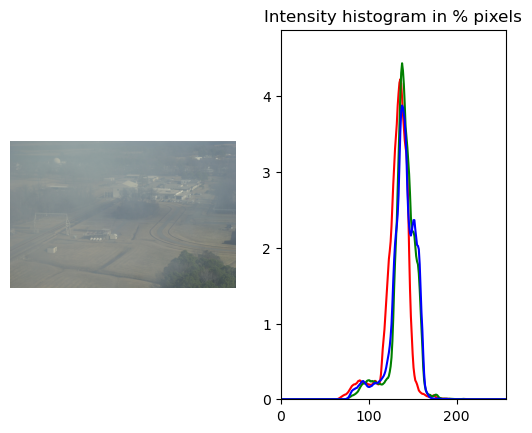

In [6]:
'''
If the original image is in color, show a color histogram.
'''
if is_color:
    # Plot the image on the left side.
    plt.subplot(121, aspect='equal')
    plt.axis("off")
    plt.gray()
    plt.imshow(im)

    # Plot the three-channel histogram on the right
    plt.subplot(122)
    color = ('r', 'g', 'b')
    max_hist = 0
    for channel, col in enumerate(color):
        histr = cv2.calcHist([im], [channel], None, [256], [0, 256])
        histr *= 100 / num_pixels   # pct of the total number of pixels
        max_hist = max(np.max(histr), max_hist)
        plt.plot(histr, color=col)

    # Generate the histogram plot, scaling the max value by 10% as before
    plt.title('Intensity histogram in % pixels')
    max_hist *= 1.1
    plt.ylim([0, max_hist])
    plt.xlim([0, 256])
    plt.show()